# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Step 1: Data understanding
- Dataframe shape
- Data types
- Description

In [3]:
df = pd.read_csv(r'src\rawDataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In this data we have 10.000 rows and 18 columns (features)

In [5]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

The dataset consists of numerical and categorical data types. Numerical columns include integers (int64) like RowNumber, CreditScore, Age, and floats (float64) like Balance and EstimatedSalary. Categorical columns are represented as object types, such as Surname, Geography, Gender, and Card Type. 

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


This table summarizes the dataset's key statistics. All columns have 10,000 values, meaning there is no missing data. The CreditScore averages around 650, with a range from 350 to 850, while the Age has a mean of 39, spanning 18 to 92. The Balance varies significantly, averaging ~76,485 but ranging from 0 to ~250,898. Features like HasCrCard and IsActiveMember are binary, showing proportions of about 70.55% and 51.51% respectively for a value of 1. Satisfaction scores average at 3, with most customers having between 1 and 4 products. Percentiles reveal that 25% of customers are aged 32 or younger, and the median balance is ~97,198. 

### Step2: Data Preparation

- Dropping irrelevant columns and rows

In [7]:
df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


'Row number', 'Surname' and 'CustomerId' columns seem to act as identifiers. They don't have much analytical value since they are unique or nearly unique, so we get rid of them.

In [8]:
df.shape

(10000, 15)

we've reduced the number of features from 18 to 15, as ther was irrelevant data for modeling

### Step 3: Feature Understanding
- Plotting Feature Distributions
- Histogram
- Boxplot
- KDE

Exited Clients:  2038
Non-Exited Clients:  7962


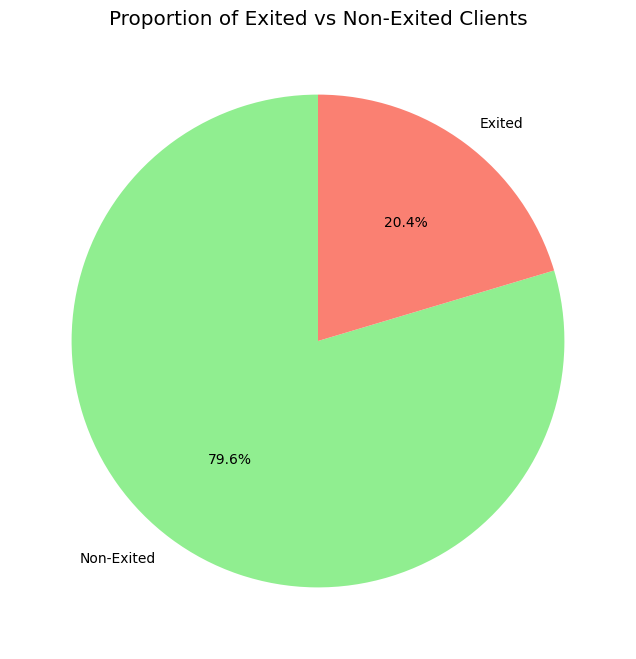

In [9]:
churn_counts = df['Exited'].value_counts()
print("Exited Clients: ", churn_counts[1])
print("Non-Exited Clients: ", churn_counts[0])

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Non-Exited', 'Exited'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proportion of Exited vs Non-Exited Clients')
plt.show()

This chart shows the distribution of churned vs non-churned clients. We can see that our dataset is completed by 2038 clients who churned and 7962 who not (20.4% - 79.6%), this indicates a moderate imbalance between the classes. This imbalance can affect model's performance and lead to poor recall for the minority class or misleading performance metrics. To adress this imbalance we could undersample non-exited clients, adjust class weights or use metrics suitable for imbalanced data.

Text(0, 0.5, 'Count')

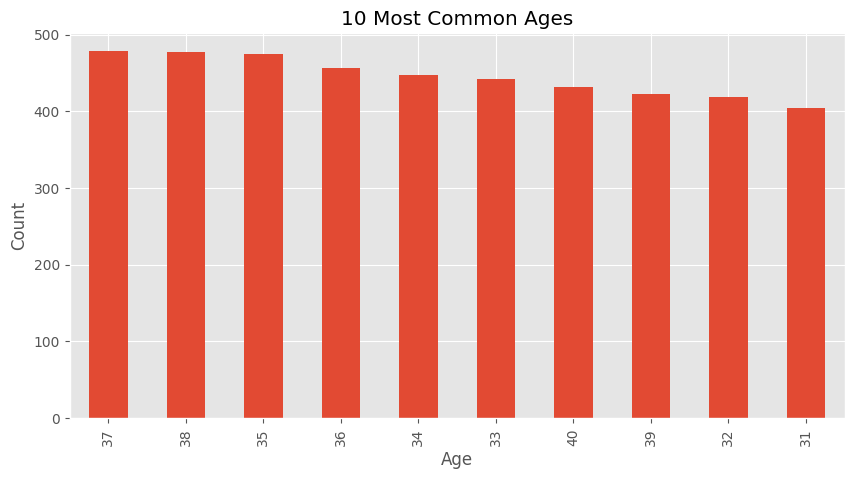

In [10]:
ax = df['Age'].value_counts() \
    .head(10) \
    .plot(kind='bar', figsize=(10,5), title='10 Most Common Ages')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

In this plot we can see how the most common clients over our dataset are middle aged clients, in between the range of 30 to 40 years old.

Text(0, 0.5, 'Count')

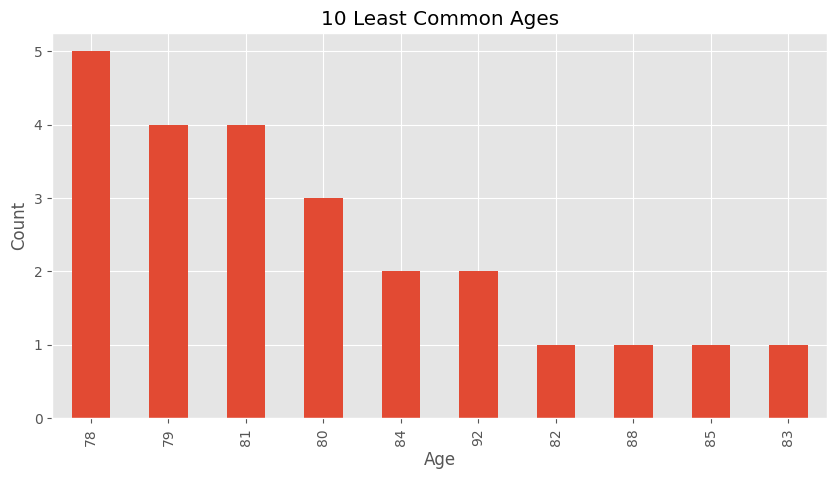

In [11]:
ax = df['Age'].value_counts() \
    .tail(10) \
    .plot(kind='bar', figsize=(10,5), title='10 Least Common Ages')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

On the other side, the 10 least common ages in the dataset predominantly belong to elderly clients, with ages around 75 years old and older. We can see that there are very few customers in this age group, which will might be treated as outliers later.

Text(0, 0.5, 'Count')

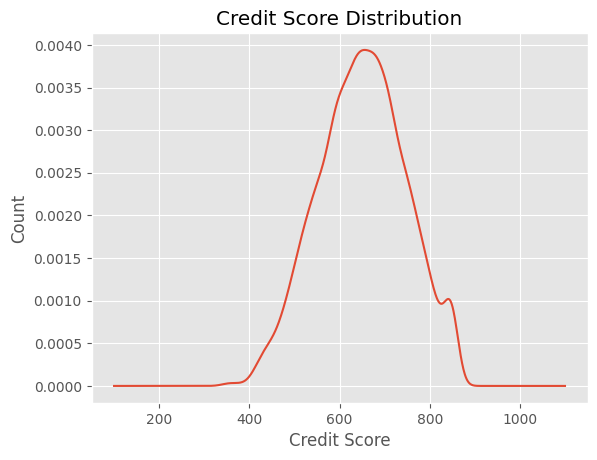

In [12]:
ax = df['CreditScore'].plot(kind='kde',
                              title='Credit Score Distribution',)

ax.set_xlabel('Credit Score')
ax.set_ylabel('Count')

The credit score distribution shows a peak around 700, indicating most customers have a high credit rating. Scores range from 400 to 900, covering a wide spectrum of creditworthiness.

Gender
Male      5457
Female    4543
Name: count, dtype: int64


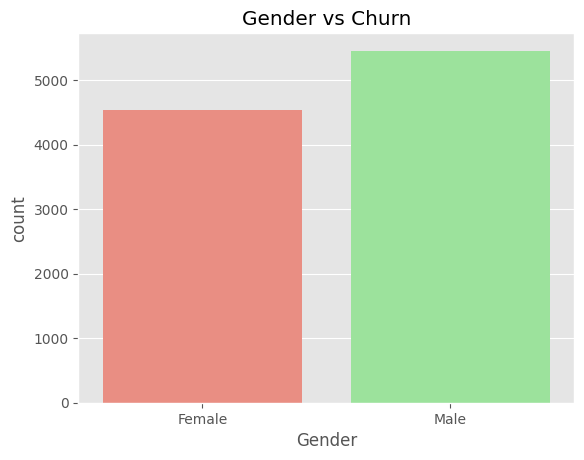

In [13]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

sns.countplot(data=df, x='Gender', hue='Gender', legend=False, palette=['salmon', 'lightgreen'])
plt.title("Gender vs Churn")
plt.show()

The data is also balanced looking at the customers gender, showing a small diference of 5457 male customers over 4543 female customers.

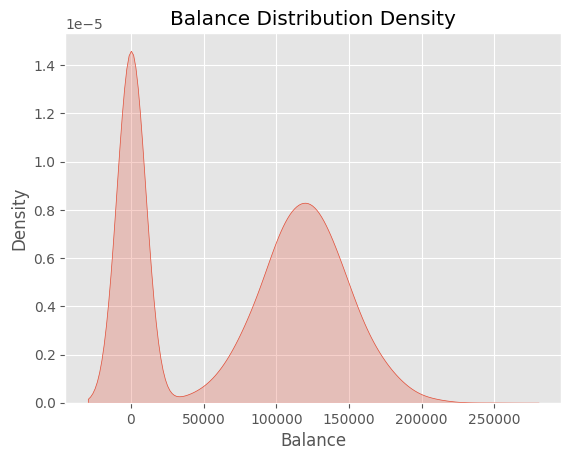

In [14]:
sns.kdeplot(data=df, x='Balance', fill=True)
plt.title("Balance Distribution Density")
plt.show()

The red curve represents the distribution of all clients, showing a broader range of balances with a peak near zero, and a smaller peak around 125.000.

Clients with a credit card (HasCrCard = 1): 7055
Clients without a credit card (HasCrCard = 0): 2945


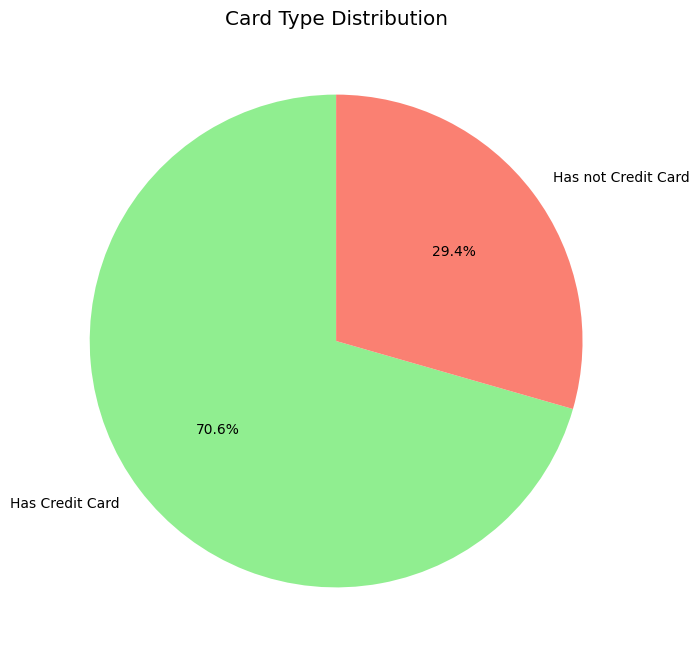

In [15]:
has_cr_card_counts = df['HasCrCard'].value_counts()
print(f"Clients with a credit card (HasCrCard = 1): {has_cr_card_counts[1]}")
print(f"Clients without a credit card (HasCrCard = 0): {has_cr_card_counts[0]}")

plt.figure(figsize=(8, 8))
plt.pie(has_cr_card_counts, labels=["Has Credit Card", "Has not Credit Card"], autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Card Type Distribution')
plt.show()
plt.show()

There appears to be a potential imbalance in the dataset between clients who have a credit card and those who do not. This imbalance might hinder the model's predictions if the group with fewer samples is underrepresented. This would be something to take into account later.

Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


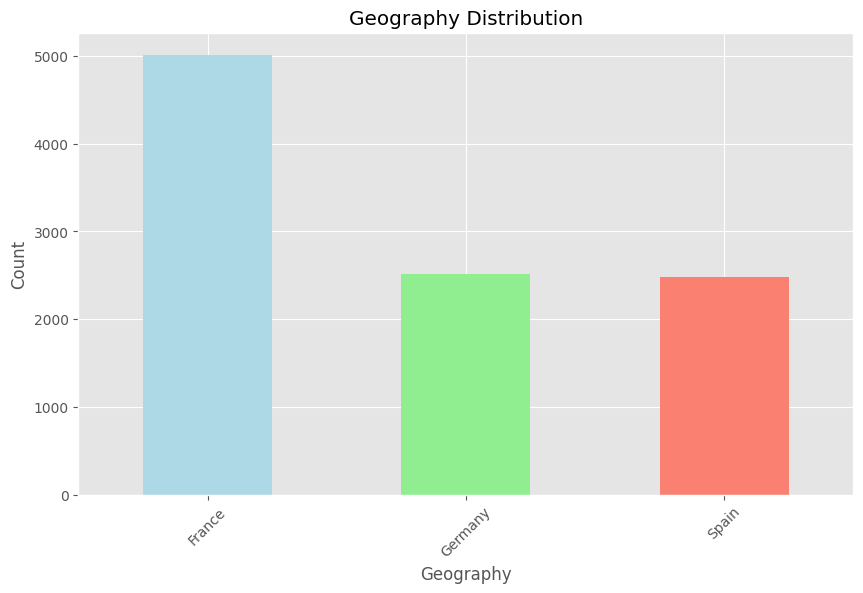

In [16]:
geography_counts = df['Geography'].value_counts()
print("Geography Distribution:\n",geography_counts)


geography_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Geography Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that France has the largest number of clients, while Germany and Spain have similar client counts. This also could mean that German and Spanish customers are undersampled in the dataset.

Card Type Distribution:
 Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


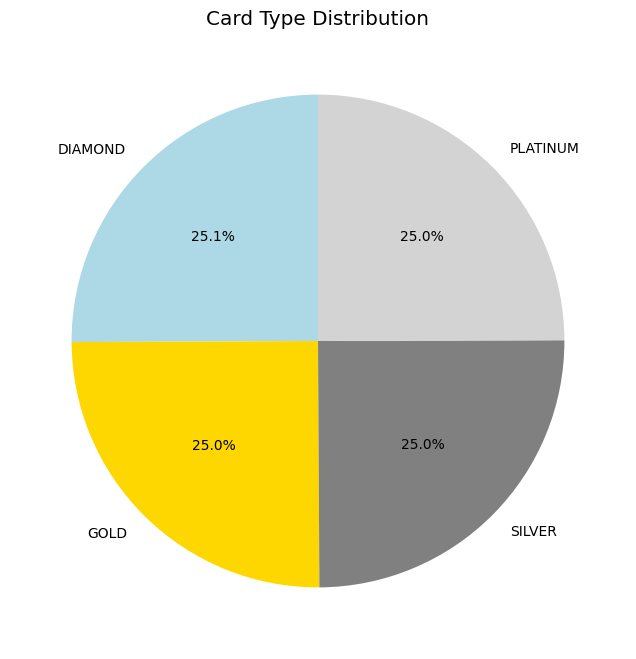

In [17]:
card_type_counts = df['Card Type'].value_counts()
print("Card Type Distribution:\n", card_type_counts)

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'gold', 'grey', 'lightgrey'], startangle=90)
plt.title('Card Type Distribution')
plt.show()

Number of Products Distribution:
 NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


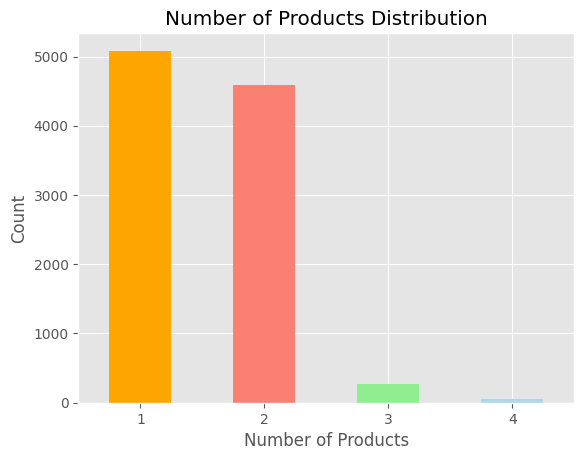

In [18]:
num_of_products_counts = df['NumOfProducts'].value_counts()
print("Number of Products Distribution:\n", num_of_products_counts)

num_of_products_counts.plot(kind='bar', stacked=True, color=['orange','salmon', 'lightgreen', 'lightblue'])
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

The dataset reveals that the majority of clients have either 1 or 2 products, while very few have 3 or 4 products. This also indicates a significant imbalance in the NumOfProducts feature, with higher product categories being underrepresented. To manage this, we could consider grouping 3 and 4 into a single category or maybe doing just 2 categories (1 product / more than 1 product).

Satisfaction Distribution:
 Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


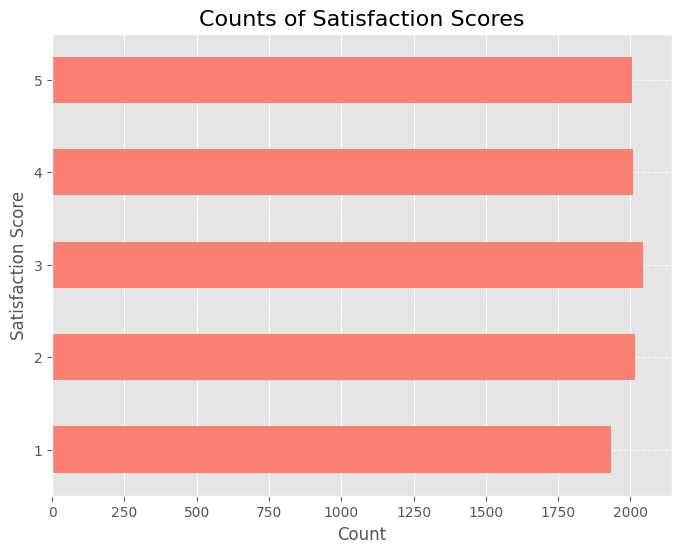

In [19]:
satisfaction_score_counts = df['Satisfaction Score'].value_counts()
print("Satisfaction Distribution:\n", satisfaction_score_counts)

plt.figure(figsize=(8, 6))
df['Satisfaction Score'].value_counts().sort_index().plot(kind='barh', color='salmon')
plt.title('Counts of Satisfaction Scores', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Satisfaction scores are balanced in the dataset, so it shouldnt disturb the modeling.

### Step 4: Feature Relationships
- Heatmap Correlation
- Pairplot
- Scatterplot
- Groupby comparisons

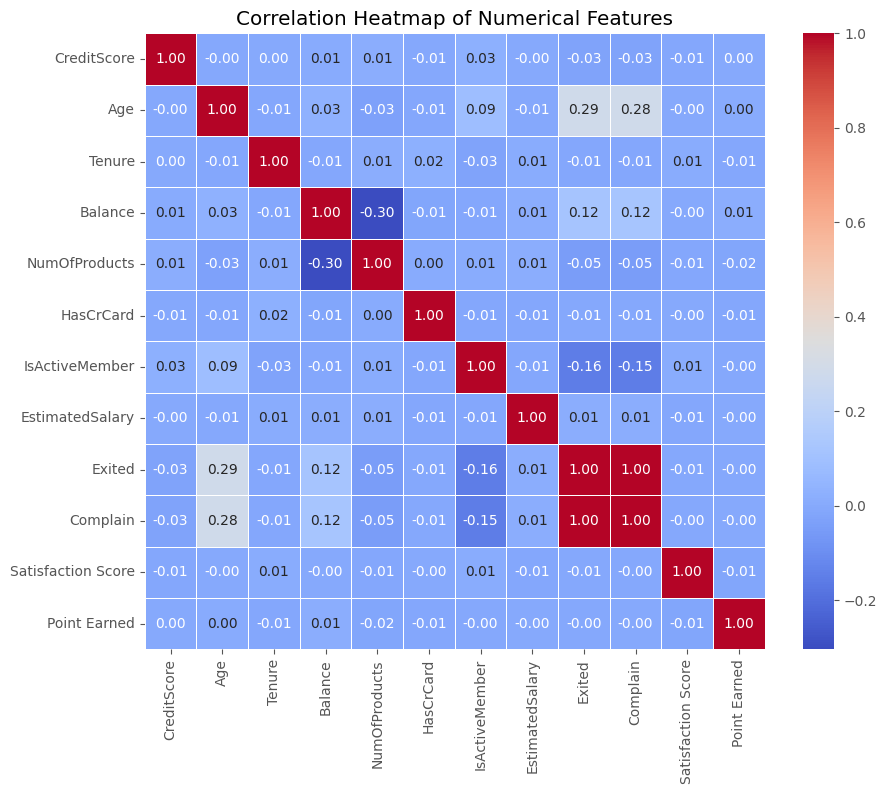

In [21]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

As we can se in this *Correlation Heatmap* not many features have big correlations between others. This are some of the most correlated features shown by the plot:
- Complain & Exit
- Number of Products & Balance
- Age & exit
- Is Active Member & Exit
- Balance & Exit

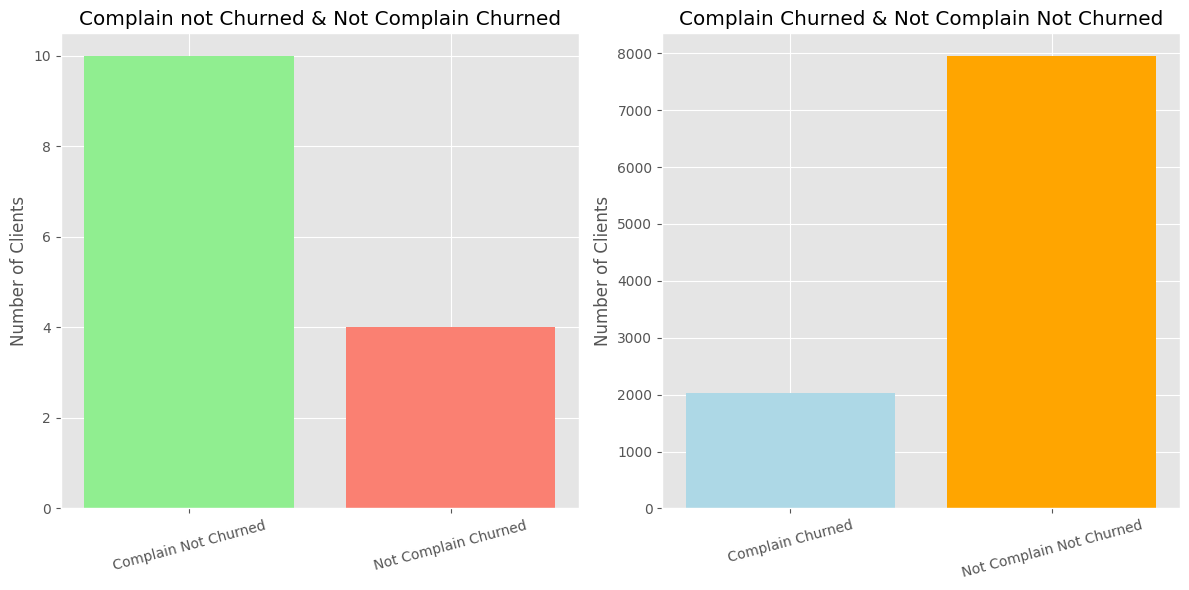

In [22]:
complain_not_churned = df[(df['Complain'] == 1) & (df['Exited'] == 0)]
complain_not_churned_count = complain_not_churned.shape[0]

not_complain_churned = df[(df['Complain'] == 0) & (df['Exited'] == 1)]
not_complain_churned_count = not_complain_churned.shape[0]

complain_churned = df[(df['Complain'] == 1) & (df['Exited'] == 1)]
complain_churned_count = complain_churned.shape[0]

not_complain_not_churned = df[(df['Complain'] == 0) & (df['Exited'] == 0)]
not_complain_not_churned_count = not_complain_not_churned.shape[0]



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(['Complain Not Churned', 'Not Complain Churned'], 
            [complain_not_churned_count, not_complain_churned_count], 
            color=['lightgreen', 'salmon'])
axes[0].set_title("Complain not Churned & Not Complain Churned")
axes[0].set_ylabel("Number of Clients")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Complain Not Churned', 'Not Complain Churned'], rotation=15)

axes[1].bar(['Complain Churned', 'Not Complain Not Churned'], 
            [complain_churned_count, not_complain_not_churned_count], 
            color=['lightblue', 'orange'])
axes[1].set_title("Complain Churned & Not Complain Not Churned")
axes[1].set_ylabel("Number of Clients")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Complain Churned', 'Not Complain Not Churned'], rotation=15)

plt.tight_layout()
plt.show()

As the previous correlation heatmap shows, the exit and complain features have a 100% correlation. Just 10 people complained and not churned and 4 people did not complain when they churned. This could lead to some potential issues, such as high predictive power of features. If complaints strongly correlate with churn, it might dominate predictions in a machine learning model, leading to biased outcomes. On other side, if complaints almost always lead to churn, it may highlight weaknesses in the bank’s issue resolution process. Addressing complaints promptly and effectively could improve retention.

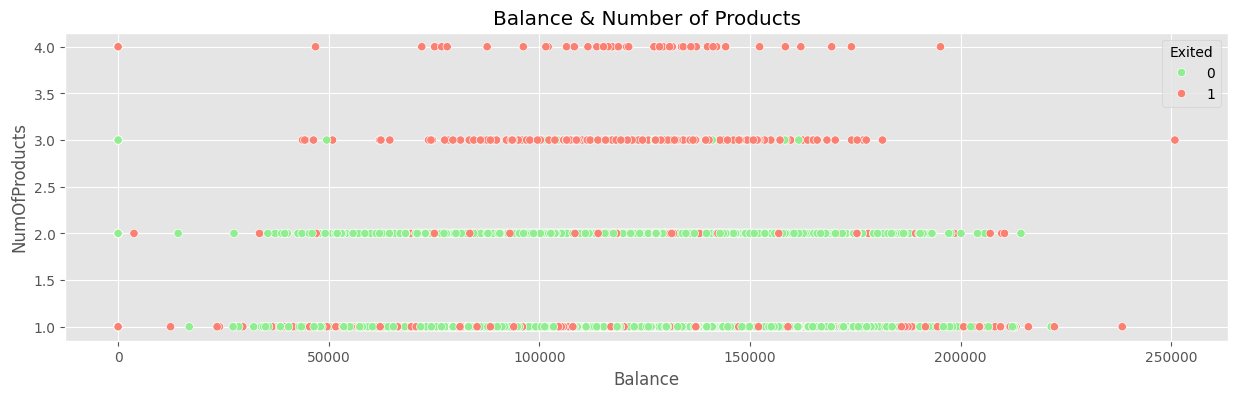

In [23]:
plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df,
    x='Balance',
    y='NumOfProducts',
    hue='Exited',
    palette=['lightgreen', 'salmon'],
)
plt.title('Balance & Number of Products')
plt.show()

In this scatterplot we can see how clients with 3 or more products have a high tendency of churning. In the feature understanding we saw how just 324 clients have 3 or more products, and we said that we might get together every client with 2 or more products.

In [24]:
aid_df = df[['Balance', 'NumOfProducts', 'Exited']].copy()
aid_df['NumOfProducts'] = aid_df['NumOfProducts'].apply(lambda x: '2+' if x >= 2 else str(x))

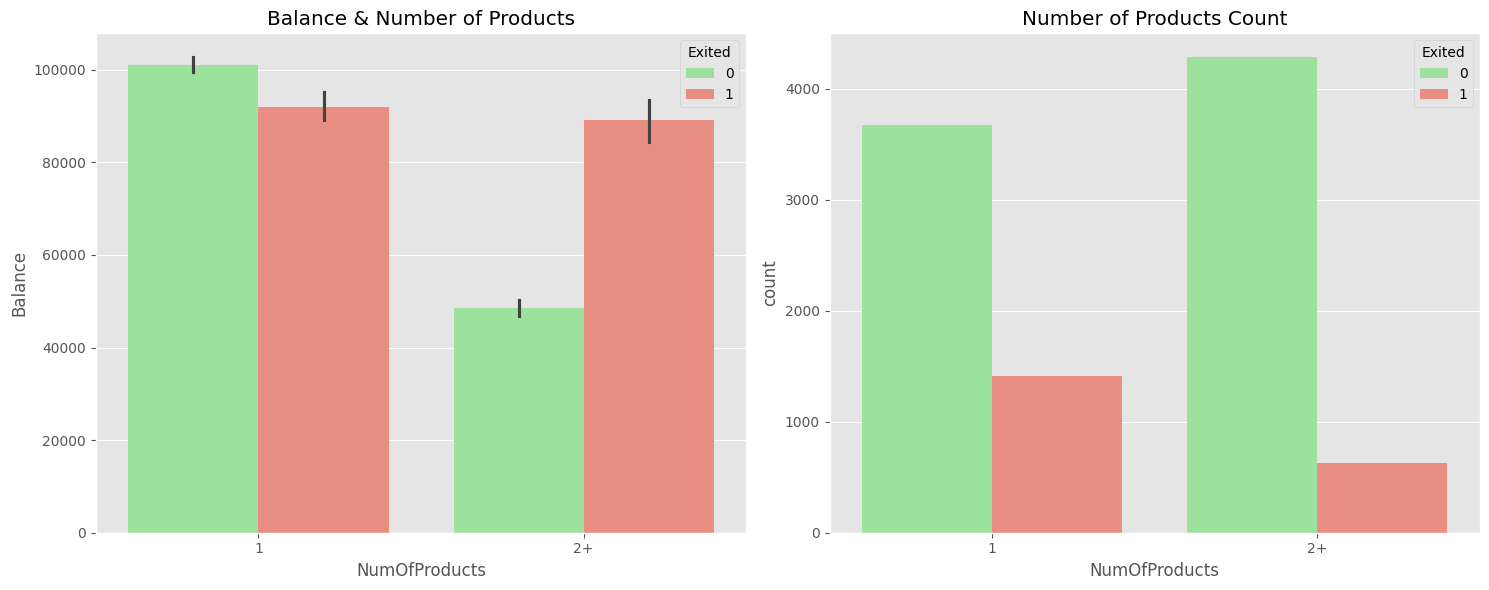

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=aid_df, x='NumOfProducts', y='Balance', hue='Exited', palette=['lightgreen', 'salmon'], ax=axes[0])
axes[0].set_title("Balance & Number of Products")

sns.countplot(data=aid_df, x='NumOfProducts', hue='Exited', palette=['lightgreen', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Products Count")

plt.tight_layout()
plt.show()

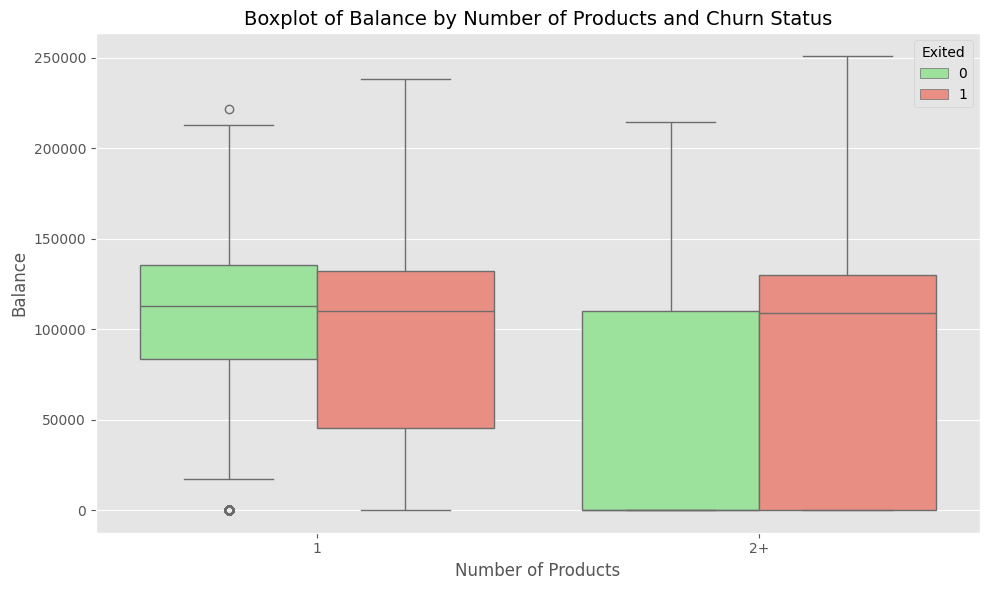

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aid_df, x='NumOfProducts', y='Balance', hue='Exited', palette=['lightgreen', 'salmon'])

# Add titles and labels
plt.title("Boxplot of Balance by Number of Products and Churn Status", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.legend(title='Exited')

# Show the plot
plt.tight_layout()
plt.show()

Customers with 2+ products tend to have higher balances on average, and a many of these customers churn. This suggests that while having more products may increase a customer's financial engagement with the bank, it also correlates with a higher risk of them leaving.

Customers with only 1 product generally have lower balances, but a relatively higher proportion of these customers also churn. This indicates that having just one product may also contribute to a higher risk of churn.

The majority of customers own 2 or more products, and they exhibit a relatively stable balance. This suggests that while churn is present, it does not dominate the behavior of the majority of customers with multiple products.

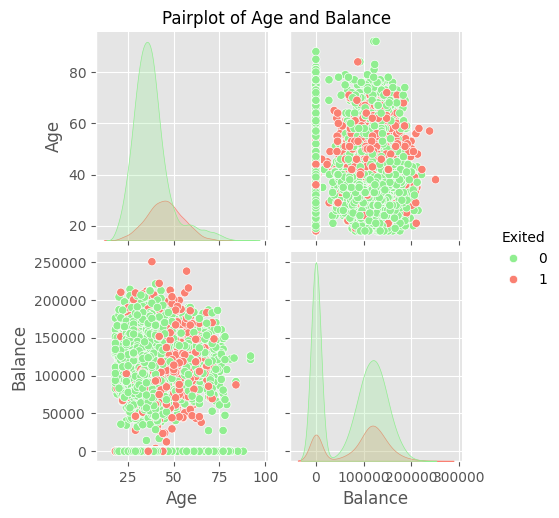

In [27]:
sns.pairplot(df, vars=['Age', 'Balance'], hue='Exited', palette=['lightgreen', 'salmon'])
plt.suptitle('Pairplot of Age and Balance', y=1.02)  # Adjust title position to avoid overlap
plt.show()

The pairplot shows the relationships between Age and Balance, with each point colored based on whether the customer churned or not. Many conclusion can be taken from this plot:

Churned clients are more concentrated in the middle age range (around 30-60 years old).

The churn rate closely follows the distribution of clients in balance range.

Churned clients with low balances are concentrated in the younger age groups, while in the 40-60 age range, churned clients have slightly higher balances (5,000-20,000).

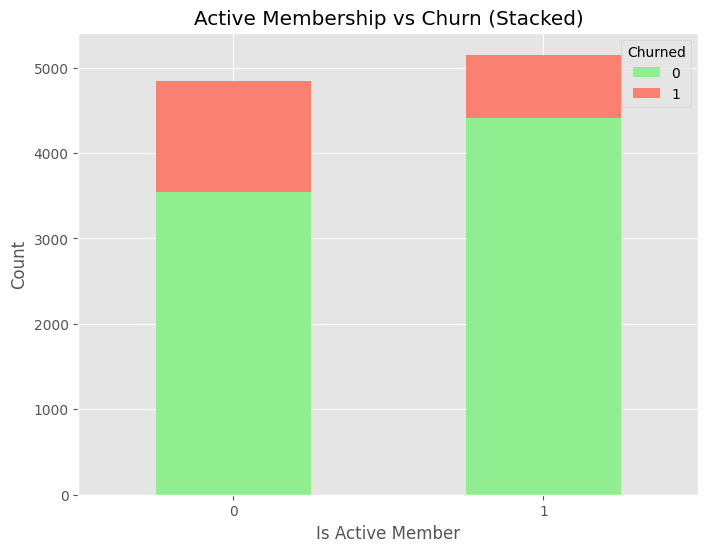

In [34]:
grouped_data = df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

grouped_data.plot(
    kind='bar', 
    stacked=True, 
    color=['lightgreen', 'salmon'], 
    figsize=(8, 6)
)

plt.title("Active Membership vs Churn (Stacked)")
plt.xlabel("Is Active Member")
plt.ylabel("Count")
plt.legend(title="Churned")
plt.xticks(rotation=0)
plt.show()

Non-active members show a slightly higher tendency to churn, as seen by their relatively larger proportion of exited clients compared to active members. This could indicate that engagement plays a role in customer retention.